In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import os

# In[50]:

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.list_physical_devices("GPU")[0]
tf.config.experimental.set_memory_growth(gpus, True)

In [3]:
data_root_orig = "/root/quan/estir/cats_and_dogs_filtered//"
data_root = pathlib.Path(data_root_orig)
print(data_root)


traing_image_path = list(data_root.glob('*/*'))

traing_image_path = [str(path) for path in traing_image_path]
label_name = sorted(item.name for item in data_root.glob('*/')
                    if item.is_dir())
label_name

/root/quan/estir/cats_and_dogs_filtered


['train', 'validation']

In [11]:
def decode_img(img_raw):
    img_tensor = tf.image.decode_jpeg(img_raw, channels=3)
    #img_tensor = (img_tensor/127.5) - 1
    #

    # 格式化0-1
    img = tf.image.convert_image_dtype(img_tensor, tf.float32)
    tf_fianl = tf.image.resize(img, [80, 80])
    return tf_fianl


def process_path(file_path):
     
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label


def get_label(file_path):
    # convert the path to a list of path components
    
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == label_name



In [16]:
model = models.Sequential([
    Conv2D(16,
           3,
           padding='same', activation='relu',
           input_shape=(80,80,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Dropout(0.2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(1)
])


In [17]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0

In [18]:
model.fit(traning_ds,  validation_data= validation_ds,epochs=10, steps_per_epoch=100, validation_steps=10)

Train for 100 steps, validate for 10 steps
Epoch 1/10
100/100 [==============================] - 23s 233ms/step - loss: 3.7534e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 22s 223ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 22s 217ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 22s 219ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 21s 213ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 20s 203ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
100/100 [===================

{'loss': [0.0003753365948796272, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


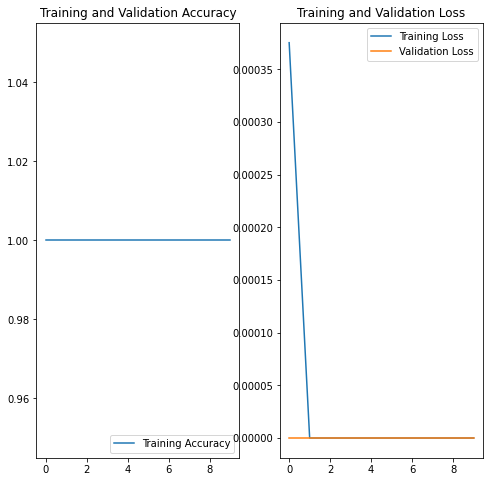

In [21]:
import matplotlib.pyplot as plt
print(model.history.history)
acc = model.history.history['accuracy']

loss = model.history.history['loss']
val_loss = model.history.history["val_loss"]
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

NameError: name 'Sequential' is not defined

In [ ]:
tf.keras.models.save_model(model,"/tmp/mobilenet/8/1")


In [27]:
test_img = tf.io.read_file(all_img_path[100])
test_img = tf.image.decode_image(test_img, channels=3)
test_image = tf.image.convert_image_dtype(test_img, dtype=tf.float32).numpy()
predict_data  = np.resize(test_image, [1,80,80,3]).tolist()
predict_data

[[[[0.13333334028720856, 0.13725490868091583, 0.11764706671237946],
   [0.12941177189350128, 0.13333334028720856, 0.11372549831867218],
   [0.14509804546833038, 0.14901961386203766, 0.12941177189350128],
   [0.16470588743686676, 0.16862745583057404, 0.14901961386203766],
   [0.16470588743686676, 0.16862745583057404, 0.14901961386203766],
   [0.14509804546833038, 0.14901961386203766, 0.12941177189350128],
   [0.1411764770746231, 0.14509804546833038, 0.125490203499794],
   [0.15294118225574493, 0.1568627506494522, 0.13725490868091583],
   [0.11372549831867218, 0.11764706671237946, 0.09803922474384308],
   [0.11372549831867218, 0.11764706671237946, 0.09803922474384308],
   [0.08627451211214066, 0.09019608050584793, 0.07058823853731155],
   [0.04313725605607033, 0.0470588281750679, 0.027450982481241226],
   [0.027450982481241226, 0.0313725508749485, 0.011764707043766975],
   [0.03921568766236305, 0.04313725605607033, 0.02352941408753395],
   [0.04313725605607033, 0.0470588281750679, 0.0274

In [25]:
model.predict(predict_data)

array([[-9.245692]], dtype=float32)

In [6]:
import json
import numpy
import requests



data = json.dumps({"signature_name": "serving_default",
                   "instances":predict_data})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mobilenet1:predict',
                              data=data, headers=headers)
print(json_response.text)
predictions = numpy.array(json.loads(json_response.text)["predictions"])
predictions[0]

NameError: name 'predict_data' is not defined

In [8]:
cat_dog_path_train = "/root/quan/estir/cats_and_dogs_filtered/train/"
cat_dog_path_test = "/root/quan/estir/cats_and_dogs_filtered/validation/"

cd_root_train = pathlib.Path(cat_dog_path_train)
cd_root_test = pathlib.Path(cat_dog_path_test)


cd_img_path = list(cd_root_train.glob('*/*'))
cd_img_path_test = list(cd_root_test.glob("*/*"))

all_image_path_validation = [str(path) for path in cd_img_path_test]

all_img_path = [str(path) for path in cd_img_path]
cd_name = sorted(item.name for item in cd_root_train.glob('*/')
                    if item.is_dir())



In [13]:
_training_ds = tf.data.Dataset.from_tensor_slices(all_img_path)
_validation_ds  = tf.data.Dataset.from_tensor_slices(all_image_path_validation)

traning_ds =  _training_ds.map(process_path).shuffle(True).repeat().batch(batch_size=100)
validation_ds =_validation_ds.map(process_path).shuffle(True).repeat().batch(batch_size=100)


tf.Tensor(b'/root/quan/estir/cats_and_dogs_filtered/validation/cats/cat.2294.jpg', shape=(), dtype=string)


In [9]:
parent_path = os.path.dirname(all_img_path[0])
os.path.split(parent_path)[-1]

'cats'